In [1]:
import time
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

from dev import phase_interp as phint

In [2]:
## Run interpolation tests on real interferograms

Loading interferogram...
Raster size= 100 100
interferogram dtype float32
Plotting interferogram overview...


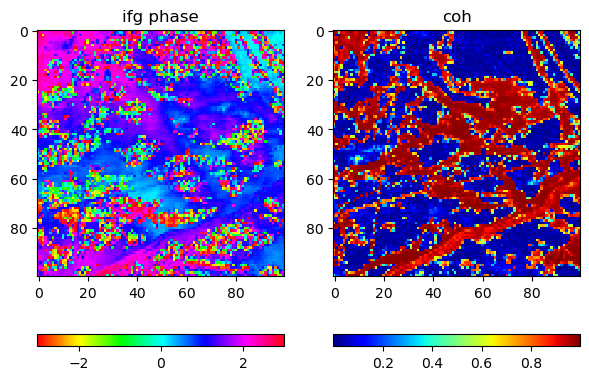

In [3]:
# Read sample

print('Loading interferogram...')

# define paths to interferogram and coherence
int_path = '/Users/cabrera/tools/ph_interp/samples/ifg_test1.int'
ds = gdal.Open(int_path, gdal.GA_ReadOnly)
print('Raster size=', ds.RasterXSize, ds.RasterYSize)
w_int = ds.GetRasterBand(1).ReadAsArray()
ds = None
int_mag = np.abs(w_int) # separate mag layer
w_int = np.angle(w_int) # separate phase layer
print('interferogram dtype', w_int.dtype)

coh_path = '/Users/cabrera/tools/ph_interp/samples/coh_test1.cor'
ds = gdal.Open(coh_path, gdal.GA_ReadOnly)
coh = ds.GetRasterBand(1).ReadAsArray()
ds = None

# Plot Igram overview
print('Plotting interferogram overview...')
fig = plt.figure(figsize=(7, 5)) # New figure
ax = fig.add_subplot(1,2,1) # subplot
cax=ax.imshow(w_int, vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
ax.set_title(r'ifg phase')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,2,2) # subplot
cax=ax.imshow(coh, cmap='jet', interpolation='nearest')
ax.set_title(r'coh')
cbar = fig.colorbar(cax, orientation='horizontal')
plt.show()


A total of  5246 pixels require interpolation
Plotting PS pixels overview...


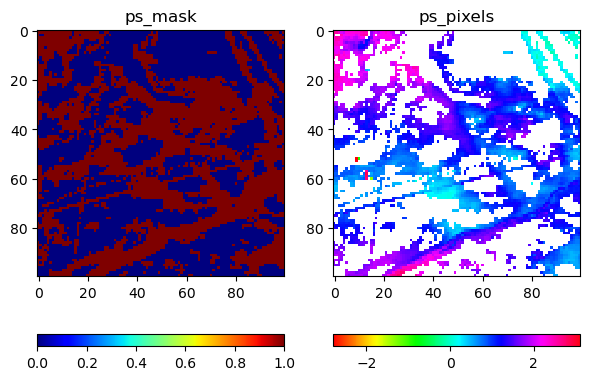

In [4]:
# tests interpolation in this cell

# define reliable pixels
ps_msk = (coh > 0.4).astype('bool')

# Get the coordinates of the pixels to be interpolated and generate a circular sample to interpolate from.
centers = np.where(ps_msk == 0)
cents_num = len(centers[0])
print('A total of ', cents_num,'pixels require interpolation')

# Plot PS pixels overview
print('Plotting PS pixels overview...')
fig = plt.figure(figsize=(7, 5)) # New figure
ax = fig.add_subplot(1,2,1) # subplot
cax=ax.imshow(ps_msk, cmap='jet', interpolation='nearest')
ax.set_title(r'ps_mask')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,2,2) # subplot
cax=ax.imshow(np.ma.masked_where(w_int*ps_msk==0, w_int*ps_msk), cmap='hsv', interpolation='nearest')
ax.set_title(r'ps_pixels')
cbar = fig.colorbar(cax, orientation='horizontal')
plt.show()



In [5]:
# Run interpolation for test array
t_all = time.time() # track processing time

# Run interpolation here !!! 
# Modify radius to increase resampling valid region.
ifg_re = np.copy(w_int*ps_msk) # array to be resampled
# run interpolation
ifg_re = phint.chen_interp(ifg_re, radius=20, fill_value=0.0) 


# Track processing time
t_all_elapsed = time.time() - t_all # track processing time
hours, rem = divmod(t_all_elapsed, 3600)
minutes, seconds = divmod(rem, 60)
print("Successfully interpolated phase in  {:0>2}:{:0>2}:{:05.2f} hours:min:secs".
      format(int(hours),int(minutes),seconds)) # track processing time


Successfully interpolated phase in  00:00:00.91 hours:min:secs


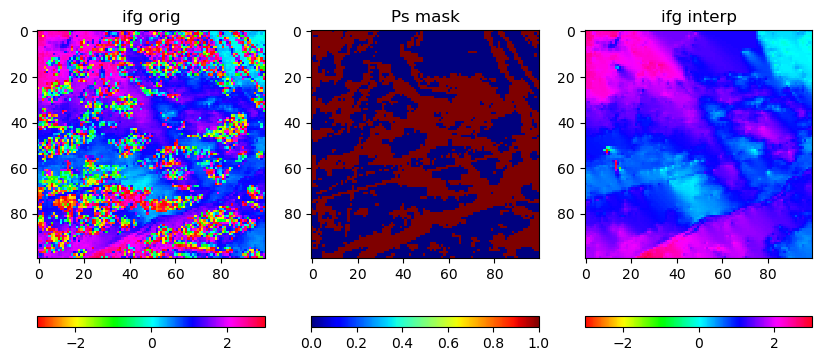

In [6]:
# Plot inerpolation overview
fig = plt.figure(figsize=(10, 5)) # New figure
ax = fig.add_subplot(1,3,1) # subplot
cax=ax.imshow(w_int, vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
ax.set_title(r'ifg orig')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,3,2) # subplot
cax=ax.imshow(ps_msk, cmap='jet', interpolation='nearest')
ax.set_title(r'Ps mask')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,3,3) # subplot
cax=ax.imshow(ifg_re, vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
ax.set_title(r'ifg interp')
cbar = fig.colorbar(cax, orientation='horizontal')
plt.show()


In [7]:
# tests interpolation after Liang's suggestions

In [8]:
# tests interpolation after Liang's suggestions
t_all = time.time() # track processing time

# Run interpolation here !!! 
# Modify radius to increase resampling valid region.
ifg_re = np.copy(w_int*ps_msk) # array to be resampled
# run interpolation
ifg_re = phint.chen_interp_v2(ifg_re, radius=20, fill_value=0.0) 


# Track processing time
t_all_elapsed = time.time() - t_all # track processing time
hours, rem = divmod(t_all_elapsed, 3600)
minutes, seconds = divmod(rem, 60)
print("Successfully interpolated phase in  {:0>2}:{:0>2}:{:05.2f} hours:min:secs".
      format(int(hours),int(minutes),seconds)) # track processing time


Successfully interpolated phase in  00:00:00.38 hours:min:secs


/Users/cabrera/tools/ph_interp/dev/phase_interp.py:74: RuntimeWarning: invalid value encountered in divide
  interp_pix = np.nansum(weighted_arr, axis=0) / np.nansum(w, axis=0)


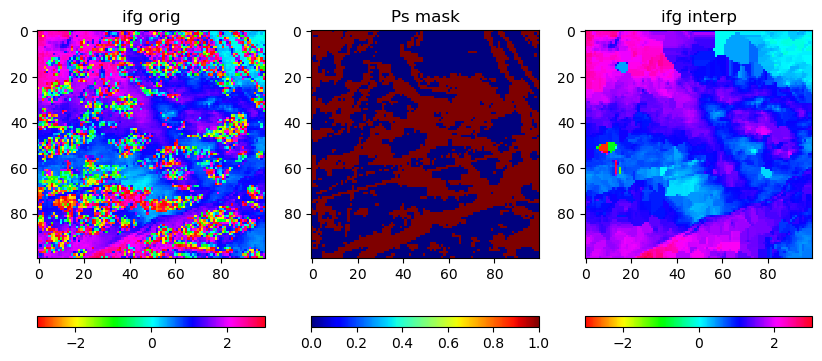

In [9]:
# tests interpolation after Liang's suggestions
# Plot inerpolation overview
fig = plt.figure(figsize=(10, 5)) # New figure
ax = fig.add_subplot(1,3,1) # subplot
cax=ax.imshow(w_int, vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
ax.set_title(r'ifg orig')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,3,2) # subplot
cax=ax.imshow(ps_msk, cmap='jet', interpolation='nearest')
ax.set_title(r'Ps mask')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,3,3) # subplot
cax=ax.imshow(ifg_re, vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
ax.set_title(r'ifg interp')
cbar = fig.colorbar(cax, orientation='horizontal')
plt.show()


In [10]:
## Test over Ke's Houston example interferogram.

Plotting interferogram overview...


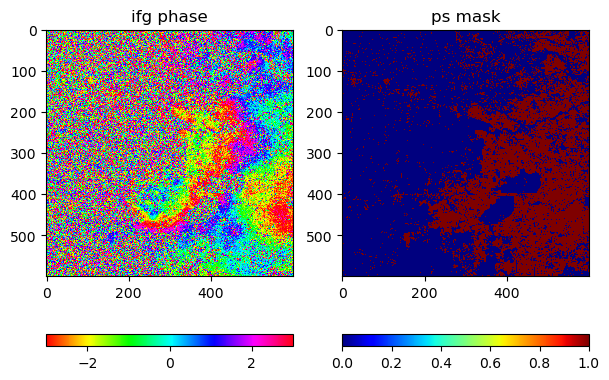

In [11]:
## Read sample data from Ke
ds = np.memmap('/Users/cabrera/tools/ph_interp/samples/ifg_test2.int', dtype=np.complex64)
ke_ifg = ds.reshape((600, -1))
ds = None

ds = np.memmap('/Users/cabrera/tools/ph_interp/samples/ps_test2.ps', dtype='bool')
ke_ps = ds.reshape((600, -1))
ds = None

# Plot Igram overview
print('Plotting interferogram overview...')
fig = plt.figure(figsize=(7, 5)) # New figure
ax = fig.add_subplot(1,2,1) # subplot
cax=ax.imshow(np.angle(ke_ifg), vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
ax.set_title(r'ifg phase')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,2,2) # subplot
cax=ax.imshow(ke_ps, cmap='jet', interpolation='nearest')
ax.set_title(r'ps mask')
cbar = fig.colorbar(cax, orientation='horizontal')
plt.show()


In [12]:
# tests interpolation 
t_all = time.time() # track processing time

# Run interpolation here !!! 
# Modify radius to increase resampling valid region.
ifg_re = np.copy(np.angle(ke_ifg)*ke_ps) # array to be resampled
# run interpolation
ifg_re = phint.chen_interp(ifg_re, radius=20, fill_value=0.0) 

# Track processing time
t_all_elapsed = time.time() - t_all # track processing time
hours, rem = divmod(t_all_elapsed, 3600)
minutes, seconds = divmod(rem, 60)
print("Successfully interpolated phase in  {:0>2}:{:0>2}:{:05.2f} hours:min:secs".
      format(int(hours),int(minutes),seconds)) # track processing time


/Users/cabrera/tools/ph_interp/dev/phase_interp.py:38: RuntimeWarning: invalid value encountered in double_scalars
  interp_pix = np.nansum(weighted_arr) / np.nansum(w)


Successfully interpolated phase in  00:17:44.63 hours:min:secs


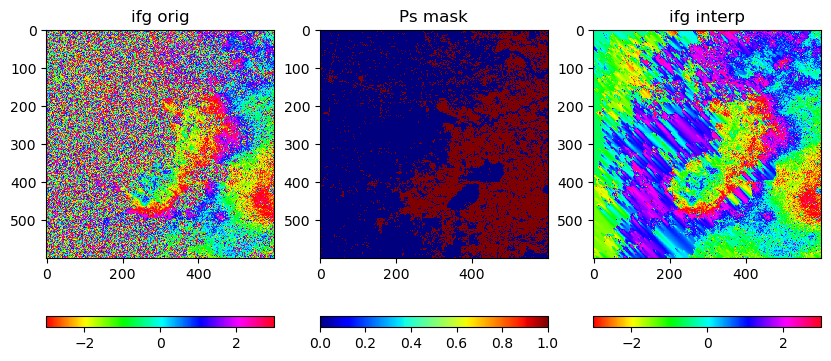

In [13]:
# Plot inerpolation overview
fig = plt.figure(figsize=(10, 5)) # New figure
ax = fig.add_subplot(1,3,1) # subplot
cax=ax.imshow(np.angle(ke_ifg), vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
ax.set_title(r'ifg orig')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,3,2) # subplot
cax=ax.imshow(ke_ps, cmap='jet', interpolation='nearest')
ax.set_title(r'Ps mask')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,3,3) # subplot
cax=ax.imshow(ifg_re, vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
ax.set_title(r'ifg interp')
cbar = fig.colorbar(cax, orientation='horizontal')
plt.show()


In [ ]:
## The example above fails when using the interpolation method v2 based on suggestions from Liang. 
## I think the reason is mainly due to how the sample matrix grows as we interpolate over more pixels.

In [ ]:
# # tests interpolation after Liang's suggestions 
# t_all = time.time() # track processing time

# # Run interpolation here !!! 
# # Modify radius to increase resampling valid region.
# ifg_re = np.copy(np.angle(ke_ifg)*ke_ps) # array to be resampled
# # run interpolation
# ifg_re = phint.chen_interp_v2(ifg_re, radius=20, fill_value=0.0) 

# # Track processing time
# t_all_elapsed = time.time() - t_all # track processing time
# hours, rem = divmod(t_all_elapsed, 3600)
# minutes, seconds = divmod(rem, 60)
# print("Successfully interpolated phase in  {:0>2}:{:0>2}:{:05.2f} hours:min:secs".
#       format(int(hours),int(minutes),seconds)) # track processing time


In [ ]:
# # tests interpolation after Liang's suggestions
# # Plot inerpolation overview
# fig = plt.figure(figsize=(10, 5)) # New figure
# ax = fig.add_subplot(1,3,1) # subplot
# cax=ax.imshow(np.angle(ke_ifg), vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
# ax.set_title(r'ifg orig')
# cbar = fig.colorbar(cax, orientation='horizontal')
# ax = fig.add_subplot(1,3,2) # subplot
# cax=ax.imshow(ke_ps, cmap='jet', interpolation='nearest')
# ax.set_title(r'Ps mask')
# cbar = fig.colorbar(cax, orientation='horizontal')
# ax = fig.add_subplot(1,3,3) # subplot
# cax=ax.imshow(ifg_re, vmin=-3, vmax=3, cmap='hsv', interpolation='nearest')
# ax.set_title(r'ifg interp')
# cbar = fig.colorbar(cax, orientation='horizontal')
# plt.show()
